# Comparing Classifiers

<table>
<tr>
</tr>
<tr>
    <td> <img src="https://covers.oreillystatic.com/images/0636920052289/lrg.jpg" align="right" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="https://covers.oreillystatic.com/images/0636920034919/lrg.jpg" align="right" alt="Drawing" style="width: 200px;"/> </td>
    </tr>
</table>

I've been going through Part I of the Hands-On book and Chapter 5 of the Python Data Science Handbook. A lot of classifiers are covered, but not everything is done to compare the classifiers on one dataset. I'll share what I have here.

The dataset used throughout will be the classic MNIST hand writing dataset. Here's a summary of the classifiers covered with the results of training:

| Section | Classifier | Accuracy | Cross<br>Validation | Training<br>Time | Testing<br>Time | Boundary    
| :--- | :--- | ---: | ---: | ---: | ---:
|Generalised Linear <br>Models | [Ridge Classifier](#Ridge_Classifier)| 0.86 | 0.85 | 2.2 | 13.5 | <img src="http://dom-brady.com/wp-content/uploads/2018/04/Ridge1.png">
|| [SGD Classifier with <br>'l2' Regularisation (Ridge)](#SGD_Classifier_with_l2_Regularisation_Ridge)| 0.91 | 0.91 | 63.2 | 187.9 | <img src="http://dom-brady.com/wp-content/uploads/2018/04/Ridge2.png">
|| [SGD Classifier with <br>'l1' Regularisation (Lasso)](#SGD_Classifier_with_l1_Regularisation_Lasso)| 0.91 | 0.87 | 269.2 | 761.3 | <img src="http://dom-brady.com/wp-content/uploads/2018/04/Lasso.png">
|| [SGD Classifier with <br>Elastic Net' Regularisation](#SGD_Classifier_with_elasticnet_Regularisation)| 0.91 | 0.87 | 307.3 | 876.3 | <img src="http://dom-brady.com/wp-content/uploads/2018/04/ElasticNet.png">
|| [Logistic Regression](#Logistic_Regression)| 0.92 | 0.91 | 771.3 | 2191.0 | <img src="http://dom-brady.com/wp-content/uploads/2018/04/LogReg.png">
|| [Softmax Regression](#Softmax_Regression)| 0.92 | 0.91 | 142.9 | 208.1 | <img src="http://dom-brady.com/wp-content/uploads/2018/04/Softmax.png">
|Support Vector <br>Machines | [SVM (using LinearSVC)](#SVM_using_LinearSVC)| 0.89 | 0.88 | 137.1 | 289.7 | <img src="http://dom-brady.com/wp-content/uploads/2018/04/SVM.png">
|| [SVM (Polynomial Kernel)](#SVM_Polynomial_Kernel)| 0.95 | 0.95 | 142.7 | 463.2 | <img src="http://dom-brady.com/wp-content/uploads/2018/04/SVMpoly.png">
|| [SVM (RBF Kernel)](#SVM_RBF_Kernel)| 0.85 | NA | 211.2 | 286.5 | <img src="http://dom-brady.com/wp-content/uploads/2018/04/SVMRBF.png">
| Nearest Neighbors | [KNeighbors Classifier](#KNeighbors_Classifier)| 0.94 | 0.94 | 38.9 | 2502.4 | <img src="http://dom-brady.com/wp-content/uploads/2018/04/KNeighbors.png">
|Decision Trees | [Decision Tree](#Decision_Tree)| 0.88 | 0.86 | 18.7 | 43.4 | <img src="http://dom-brady.com/wp-content/uploads/2018/04/DecisionTree.png">
|Ensemble Methods | [Random Forest](#Random_Forest)| 0.95 | 0.94 | 2.5 | 8.0 | <img src="http://dom-brady.com/wp-content/uploads/2018/04/RandomForest.png">
|| [Voting](#Voting)| 0.95 | 0.94 | 2.5 | 1983.7 | <img src="http://dom-brady.com/wp-content/uploads/2018/04/Voting.png">
|| [Adaboost](#Adaboost)| 0.94 | 0.93 | 219.2 | 513.6 | <img src="http://dom-brady.com/wp-content/uploads/2018/04/Adaboost.png">
|| [Bagging](#Bagging)| 0.94 | 0.93 | 38.3 | 169.4 | <img src="http://dom-brady.com/wp-content/uploads/2018/04/Bagging.png">
|Dimension <br>Reduction | [SVM & Dimension Reduction <br>(Randomised PCA)](#SVM_&_Dimension_Reduction_Randomised_PCA))| 0.90 | 0.89 | 60.0 | 175.1 | NA

A quick note on some definitions:

-  Classifier<br>
What we're interested in here. Train a classifier to divide a dataset into discrete groups, in this case the digits 0 to 9. When a new handwritten image is presented, the classifier says which group it belongs.

-  Regression<br>
Best fit a line to some data. Not covered here. 

-  Reglarisation<br>
We're will be going to a lot of trouble to test that we have a good model. By adding regularisation to a model, we limit the amount of bespoke tailoring that can be done on the training data, and we end up with a better model because of it, more generalised and able to classify unseen data better.

It can be confusing. Some algorithms can be used for both classification and regression with small modifications, such as decision trees. LogisticRegression, despite its name, is a linear model that can be used for classification. 

Before we train any classifiers, lets have a look at the dataset we'll be working with:

## Getting Familiar with the Dataset

First a few setup tasks, and then getting the dataset:

In [79]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns; sns.set()

from timeit import default_timer as timer
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from matplotlib.colors import LinearSegmentedColormap

np.random.seed(42)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
#Store Results
classifier_metrics = []
#Start our global timer
notepad_timer_start = timer()
# Get the IRIS dataset
iris = load_iris()
X_iris = iris.data[:, :2]  # we only take the first two features.
y_iris = iris.target
ITERATIONS=200

A function to plot classifier boundaries will come in useful:

In [80]:
def plot_iris_clf(clf, x_axis, aspect, size):
    # Create the colormap
    colors = [(1, 1, 1), (0.9529, 0.7843, 0.2824), (0.7098, 0.7569, 0.8235)]  # white -> G -> B
    cm = LinearSegmentedColormap.from_list('my_list', colors, N=3)    
    x_min, x_max = x_axis[:, 0].min(), x_axis[:, 0].max()
    y_min, y_max = x_axis[:, 1].min(), x_axis[:, 1].max()
    if size=='small':
        marker_size=2
        sns.set_style({'axes.linewidth': 1, 'axes.edgecolor':'black'})
        # Turn off tick labels
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    else:
        marker_size=60
        sns.set_style({'axes.linewidth': 1, 'axes.edgecolor':'black'})
    # Plot the decision boundary.
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)    
    plt.imshow(Z, interpolation='nearest', cmap='Blues', alpha=0.2, extent=[x_min-0.05, x_max+0.05, y_min-0.05, y_max+0.05], origin='lower')
    #plot the iris data points
    plt.scatter(x_axis[:, 0], x_axis[:, 1], c=y_iris, cmap=plt.get_cmap('Set1'), edgecolor='face', linewidth='0.5', alpha=1, s=marker_size)
    #plot axis
    plt.xlim(x_min-0.05, x_max+0.05)
    plt.ylim(y_min-0.05, y_max+0.05)
    # Minor ticks
    ax.set_xticks(np.arange(x_min-0.05, x_max+0.05, 0.1), minor=True);
    ax.set_yticks(np.arange(y_min-0.05, y_max+0.05, 0.1), minor=True);
    # Gridlines based on minor ticks
    if size=='small':
        ax.grid(False)
    else:
        ax.grid(which='minor', color='grey', linestyle='-', linewidth=0.1)
        ax.grid(which='major', color='grey', linestyle='-', linewidth=0)
        ax.grid(False)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
    #plot settings
    ax.set_facecolor('xkcd:white')
    ax.set_aspect(aspect)
    plt.tight_layout()

Conveniently, scikit-learn has a built-in utility for loading the MNIST hand-writing dataset:

In [81]:
# Get the dataset
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

# Convert to Pandas DataFrames
y = pd.Series(mnist.target).astype('int').astype('category')
X = pd.DataFrame(mnist.data)

# Add in column names
num_images = X.shape[1]
X.columns = ['pixel'+str(x) for x in range(num_images)]

We now have our data. We've got a dataframe 'X' with each row containing 784 values. Each individual image of a handwritten digit is captured as a 28x28 pixel grayscale image, and captured out as a single row of 784 values. This is labelled data - we also have a dataframe 'y' which is a list of the correct labels for each image in the dataframe 'X'. You can see from the shape of the dataframes that we have 70000 images (each made up of 784 pixels) and 70000 corresponding labels: 

In [82]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


Let's have a look at the first row of 'X':

In [83]:
# print first row of our data X
X.head(1)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can't see what handwritten digit this is when it's a single row of 784 values. Ploting as a 28x28 image rather than a row of 784 numbers lets us see the image:

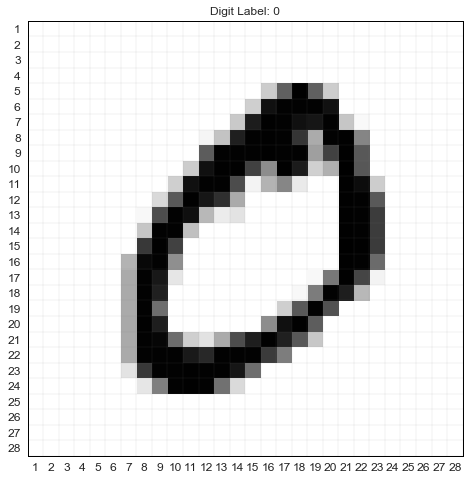

In [84]:
# First row is first image
first_image = X.loc[0,:]
first_label = y[0]

sns.set_style({'axes.linewidth': 1, 'axes.edgecolor':'black'})

# Reshape 784 values as a 28x28 image
#plottable_image = np.reshape(first_image.values, (28, 28))
fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.title('Digit Label: {}'.format(first_label))
im = plt.imshow(np.reshape(first_image.values, (28, 28)), cmap = matplotlib.cm.binary)

# Major ticks
ax.set_xticks(np.arange(0, 28, 1));
ax.set_yticks(np.arange(0, 28, 1));

# Labels for major ticks
ax.set_xticklabels(np.arange(1, 29, 1));
ax.set_yticklabels(np.arange(1, 29, 1));

# Minor ticks
ax.set_xticks(np.arange(-.5, 28, 1), minor=True);
ax.set_yticks(np.arange(-.5, 28, 1), minor=True);

# Gridlines based on minor ticks
ax.grid(which='minor', color='grey', linestyle='-', linewidth=0.1)
ax.grid(which='major', color='w', linestyle='-', linewidth=0)


It looks likea zero, and the label confirms this. Let's look at some other examples from our dataset to get some intuition into what we're dealing with:

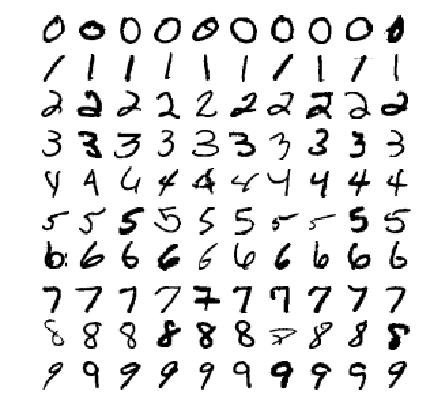

In [85]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
        
plt.figure(figsize=(7,7))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

We split the dataset into a training set (60000 entries) and a test set (10000 entries), and give the training set a shuffle. This allows us to show the model some 'unseen' images from the test set to see how accurate it is. Why can’t we just build a model with all of the data. Wouldn't we get a better model by training it on 70000 images instead of 60000? 

We're going to see that it's easy to train a classifier with 70000 images to get the accuracy very high, but it can get too good! This is called overfitting. The model can get too specialised on the 70000 images, developed just for this one set of training data. We've created a bespoke suit tailored to fit around just this one training dataset, but it's not a good fit for anyone else (any other data). By saving an 'unseen' test set, we get to test the model after it has been trained and see if it is overfitting, where we'd see it do very well on the training set but badly on the test set. We're going to go to a lot of effort to check for overfitting!

Let's split the data into the training and test sets, and give the training set a shuffle:

In [86]:
#Now generate Train and Test sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#Shuffle the training set
idx = np.random.permutation(60000)
X_train = X_train.reindex(idx).reset_index(drop=True)
y_train = y_train.reindex(idx).reset_index(drop=True)

Before continuing, we can also visualise the whole dataset in one image. With 784 pixels per image (784 dimensions to be visualised) it's difficult to effectively draw this. Instead, let's reduce the dimensions to two using a manifold learning algorithm called Isomap:

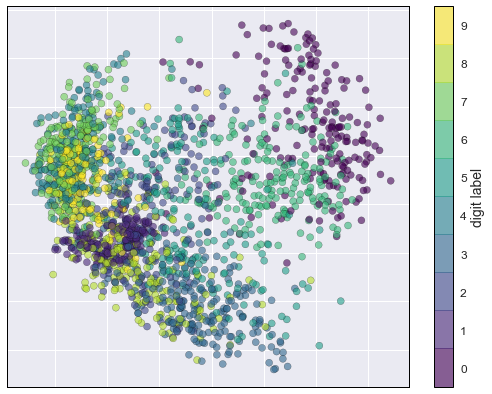

In [87]:
from sklearn.manifold import Isomap

# use only 1/30 of the data: full dataset takes a long time.
X_data = X_train[::30]
y_data = y_train[::30]

model = Isomap(n_components=2)
proj = model.fit_transform(X_data)

fig, ax = plt.subplots(1, 1, figsize=(9,7))
plt.scatter(proj[:, 0], proj[:, 1], c=y_data,
            edgecolor='black', alpha=0.6,
            cmap=plt.cm.get_cmap('viridis', 10))
plt.colorbar(label='digit label', ticks=range(10))

sns.set_style({'axes.linewidth': 1, 'axes.edgecolor':'black'})

# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])

plt.clim(-0.5, 9.5);

Finding dividing lines to seperate (and therefore classify) these 10 digits looks impossible. Fortunately, projecting the data into 2-dimensions only gives us a little intuition into the problem difficulty. Making use of more dimensions will help. Limiting to 2-dimensions is just for visualisation. The MNIST hand writing dataset can be classified accurately very well as we'll see.

For some more insight into the problem, we can also have a look across the whole dataset and see each pixel's importance when it comes to classifying our digits:

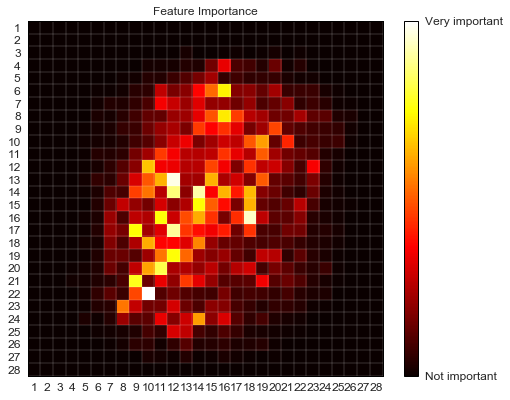

In [88]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])
norm = ((rnd_clf.feature_importances_/rnd_clf.feature_importances_.max())*255)
norm_int = norm.astype(int)

fig, ax = plt.subplots(1, 1, figsize=(7,7))
plt.title('Feature Importance')
sns.set_style({'axes.linewidth': 1, 'axes.edgecolor':'black'})
im = plt.imshow(np.reshape(norm_int, (28, 28)), cmap = matplotlib.cm.hot)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.3)
#cbar.set_frame_on(True)
cbar = plt.colorbar(im, cax=cax, ticks=[norm_int.min(), norm_int.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
# Major ticks
ax.set_xticks(np.arange(0, 28, 1));
ax.set_yticks(np.arange(0, 28, 1));
# Labels for major ticks
ax.set_xticklabels(np.arange(1, 29, 1));
ax.set_yticklabels(np.arange(1, 29, 1));
# Minor ticks
ax.set_xticks(np.arange(-.5, 28, 1), minor=True);
ax.set_yticks(np.arange(-.5, 28, 1), minor=True);
# Gridlines based on minor ticks
ax.grid(which='minor', color='white', linestyle='-', linewidth=0.2)
ax.grid(which='major', color='w', linestyle='-', linewidth=0)


<a id='Ridge_Classifier'></a>
## Ridge Classifier

Before we train on the MNIST handwriting images, let's have a quick look at how this Ridge Classifier behaves on some simple data we can easily plot. We're going to use the Iris datset. We'll plot the width and length of the sepals for three species of Iris flower:

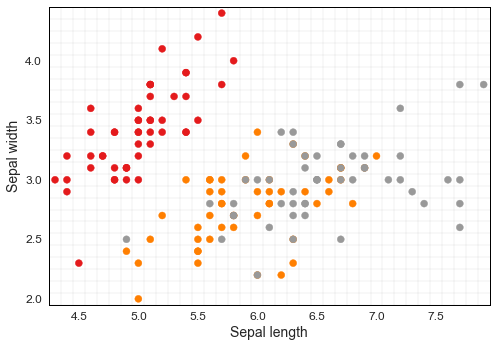

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(7,5)) 
#sns.set_style({'axes.linewidth': 1, 'axes.edgecolor':'black'})
x_min, x_max = X_iris[:, 0].min(), X_iris[:, 0].max()
y_min, y_max = X_iris[:, 1].min(), X_iris[:, 1].max()
#plot the iris data point
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, edgecolor='face', linewidth='0.4', alpha=1, cmap=plt.cm.Set1)
#plt.Axes()
ax.axes.set_visible(True)
#plot axis
plt.xlim(x_min-0.05, x_max+0.05)
plt.ylim(y_min-0.05, y_max+0.05)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
# Minor ticks
ax.set_xticks(np.arange(x_min-0.05, x_max+0.05, 0.1), minor=True);
ax.set_yticks(np.arange(y_min-0.05, y_max+0.05, 0.1), minor=True);
# Gridlines based on minor ticks
ax.grid(which='minor', color='grey', linestyle='-', linewidth=0.1)
ax.grid(which='major', color='grey', linestyle='-', linewidth=0)
#plot settings
ax.set_facecolor('xkcd:white')
ax.set_aspect(1)
plt.tight_layout()

Now we have some simple data, let's train the Ridge Classifier on it and see how it does splitting this data into three groups:

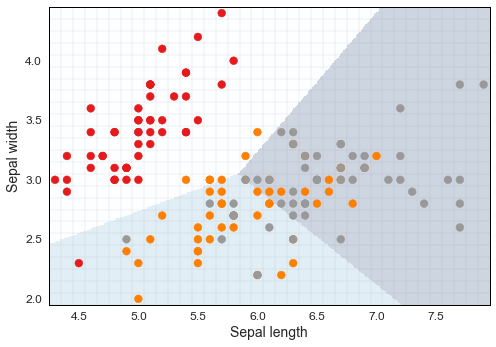

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ridge_clf = RidgeClassifier(random_state=42, alpha=0.0001, solver='cholesky', max_iter=100000)
ridge_clf.fit(X_iris, y_iris)
plot_iris_clf(ridge_clf, X_iris, 1, 'large')

That doesn't look great. Can you find the point at sepal length = 5.4, sepal width = 3.0? You can see it falls on the wrong side  of the classifier boundary. This is item 84 in our dataset. Let's check it in our dataset:

In [91]:
print(X_iris[84])
print(y_iris[84])

[ 5.4  3. ]
1


This point should be classed as label '1'. Let's check our trained Ridge Classifier by asking it to make a prediction on this point:

In [92]:
#make a prediction
somedigit = [5.4, 3]
prediction = ridge_clf.predict([somedigit])
print(prediction)

[0]


Our classifier predicted a label '0', but it is really a label '1'. The boundary line is indeed not good in this case. The point of this is to illustrate the decision boundaries but while we get some intuition, it does not necessarily carry over to larger datasets. In high-dimensional spaces, data can more easily be separated linearly.

Let's train a Ridge Classifier on our handwriting dataset, and see how it does on a this larger dataset:

In [93]:
#Train Model
start_training = timer()
ridge_clf = RidgeClassifier(random_state=42, alpha=0.0001, solver='cholesky', max_iter=ITERATIONS)
ridge_clf.fit(X_train, y_train)
end_training = timer()

#Get Metrics
cross_val = cross_val_score(ridge_clf, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)
y_test_pred = ridge_clf.predict(X_test)
score = accuracy_score(y_test, y_test_pred)
end_train_test = timer()

The classifier has been trained on the training data! We've then used this classifier to make predictions on the test data set. Let's look at some metrics to say how it's performed:

In [94]:
print("Accuracy: %.2f" % score)
print("Cross validation Accuracy: %0.4f" % cross_val.mean())
print("Training Time: %.1f sec" % (end_training-start_training))
print("Testing Time: %.1f sec" % (end_train_test-start_training))

Accuracy: 0.86
Cross validation Accuracy: 0.8483
Training Time: 2.2 sec
Testing Time: 13.5 sec


Accuracy (here the overall accuracy of a multiclass classifier and based on our test set) is the most intuitive measure of how good our classifier is. We made 8603 correct predictions (the sum of the diagonal of our confusion matrix) out of 10000 samples. Accuract is 0.86.

Cross Validation Accuracy shows how good the predictions are on our training set. This let's us check for overfitting. High cross validation accuracy (this is on our training dataset) but low accuracy (this is on our test dataset) would indicate overfitting. Our model is great on the training dataset, a bespoke suit has been made for the datset, but it's not great on our unseen test set. 

If we have terrible scores for both Accuracy (test dataset) and Cross Validation Accuracy (training dataset) then we are underfitting - our model isn't good enough.

Finally, training time logs the time taken. 

We're going to store these metrics for each classifier so we can comapre the results later on:

In [95]:
#Store and Print Summary
metrics = ['Ridge Classifier', score, cross_val.mean(), (end_training-start_training), (end_train_test-start_training)]
classifier_metrics.append(metrics)

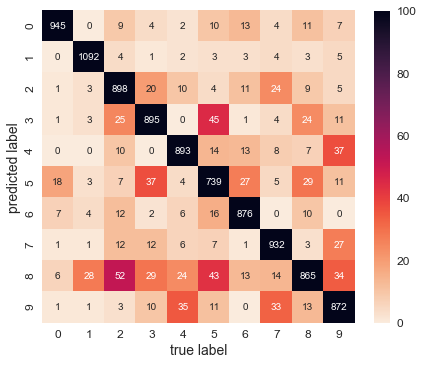

In [154]:
conf_mx = confusion_matrix(y_test, y_test_pred)

#np.fill_diagonal(conf_mx, 0)
plt.figure(figsize=(7, 7))

im = plt.imshow(np.reshape(norm_int, (28, 28)), cmap = matplotlib.cm.hot)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.3)
#cbar.set_frame_on(True)
cbar = plt.colorbar(im, cax=cax, ticks=[norm_int.min(), norm_int.max()])
#cbar.ax.set_yticklabels(['Not important', 'Very important'])

sns.heatmap(conf_mx.T, square=True, annot=True, fmt='d', cbar=True
            , cbar_kws={"shrink": .82}, cmap=sns.cm.rocket_r, vmin=0, vmax=100)

plt.xlabel('true label')
plt.ylabel('predicted label');

Looking at the 5's colummn for example, we see that it gets incorrectly predicted as a '3' as the most common mistake, with 72 instances. Sounds plausible, from the similarity in the way these two digits look. The column therefore shows the false negatives. 

Note that the correct predictions form a diagonal line across the confusion matrix. There were 659 5's correctly classed as 5's.

We can take a look at the classification report for this classifier for a little more information:

In [97]:
print(classification_report(y_test_pred, y_test))

             precision    recall  f1-score   support

          0       0.96      0.91      0.93      1041
          1       0.98      0.84      0.90      1325
          2       0.79      0.92      0.85       886
          3       0.87      0.85      0.86      1036
          4       0.90      0.81      0.85      1085
          5       0.74      0.88      0.80       747
          6       0.91      0.88      0.90       995
          7       0.86      0.85      0.86      1035
          8       0.78      0.84      0.81       900
          9       0.79      0.84      0.82       950

avg / total       0.87      0.86      0.86     10000



Precision focusses in on the false positives (the columns in the confusion matrix). For example in our column for 5's, how many did we predict correctly (659) as a ratio of the total number of 5's in the test dataset (892).

Recall focusses in on the false negatives (the rows in the confusion matrix). For example in our row for 5's, how many did we predict correctly (659) as a ratio of the total number of '5' predictions made (747).

f1-score is a weighted sum of precision and recall.
 
Looks like 5 is our worst performer, followed by 2, 8 and 9. Let's also plot the confusion matrix:

<a id='SGD_Classifier_with_l2_Regularisation_Ridge'></a>
## SGD Classifier with l2 Regularisation (Ridge)

The SGD Classifier allows you to select from a few classifier, defaulting to ‘hinge’ which gives a linear SVM. It implements these type of classifier with Stochastic Gradient Descent (SGD) learning, which is how it converges to the best boundary between classifiers. The SGDClassifier can also treat the data in batches and so can be used on very large datasets.

The penalty parameter of the Stocastic Gradient Decent Classifier sets the type of regularisation. Specifying 'l2' indicates that you want to add Ridge regularisation, making it another way to do the previous Ridge Classifier. Let's just quickly check this:

In [98]:
#Train Model
start_training = timer()
sgd_clf = SGDClassifier(random_state=42, n_jobs=-1, penalty='l2', max_iter=ITERATIONS)
sgd_clf.fit(X_train, y_train)
end_training = timer()

#Get Metrics
cross_val = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)
y_test_pred = sgd_clf.predict(X_test)
score = accuracy_score(y_test, y_test_pred)
end_train_test = timer()

In [99]:
print("Accuracy: %.4f" % score)
print("Cross validation Accuracy: %0.4f" % cross_val.mean())
print("Training Time: %.1f sec" % (end_training-start_training))
print("Testing Time: %.1f sec" % (end_train_test-start_training))

Accuracy: 0.8790
Cross validation Accuracy: 0.8734
Training Time: 60.9 sec
Testing Time: 182.0 sec


Yes, it's giving similar accuracy as the Ridge Classifier.

SGD Classifier is sensitive to feature scaling, so it is recommended to scale your data first. Let's train the SGD Classifier with 'l2' regularisation and add in some scaling with the StandardScaler class.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using the transform method.

Remember, these classifiers don't know it's a 28x28 image and aren't classifying the handwritten digit anywhere in the image. They are just being given a row of 784 numbers and being asked to classify based on that. If two images are the same, but offset from one another by say 5 pixels, it's going to have a hard time to figure out they are the same digit. Centering and scaling our data sounds like it will give it a fighting chance. Let's try it:

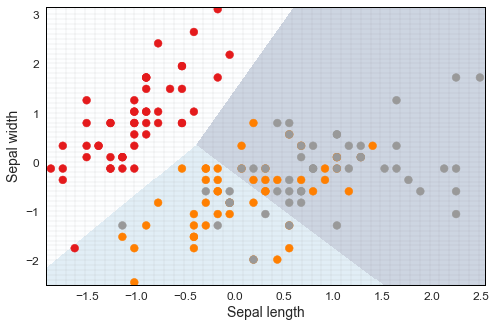

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris.astype(float))
sgd_clf = SGDClassifier(random_state=42, n_jobs=-1, penalty='l2', max_iter=100000)
sgd_clf.fit(X_iris_scaled, y_iris)
plot_iris_clf(sgd_clf, X_iris_scaled, 0.5, 'large')

Notice that the axis scales on the plot have changed compared to the unscaled plot in the Ridge Classifier. It looks like some scaling has happened and it's shifted the data to get it centered about zero.

In [101]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

#Train Model
start_training = timer()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
sgd_clf = SGDClassifier(random_state=42, n_jobs=-1, penalty='l2', max_iter=ITERATIONS)
sgd_clf.fit(X_train_scaled, y_train)
end_training = timer()

#Scale the test set first
X_test_scaled = scaler.fit_transform(X_test.astype(float))

#Get Metrics
cross_val = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy", n_jobs=-1)
y_test_pred = sgd_clf.predict(X_test_scaled)
score = accuracy_score(y_test, y_test_pred)
end_train_test = timer()

#Store and Print Summary
metrics = ['SGD Classifier with l2 Regularisation (Ridge)', score, cross_val.mean(), (end_training-start_training), (end_train_test-start_training)]
classifier_metrics.append(metrics)

In [102]:
print("Accuracy: %.4f" % score)
print("Cross validation Accuracy: %0.4f" % cross_val.mean())
print("Training Time: %.1f sec" % (end_training-start_training))
print("Testing Time: %.1f sec" % (end_train_test-start_training))

Accuracy: 0.9124
Cross validation Accuracy: 0.9113
Training Time: 63.2 sec
Testing Time: 187.9 sec


Yes, scaling has improved our accuracy.

<a id='SGD_Classifier_with_l1_Regularisation_Lasso'></a>
## SGD Classifier with 'l1' Regularisation (Lasso)

We have another couple of regularisation types to check-out. Previously we used 'l2' regularisation (Ridge). Let's try 'l1' regularisation (Lasso) this time: 

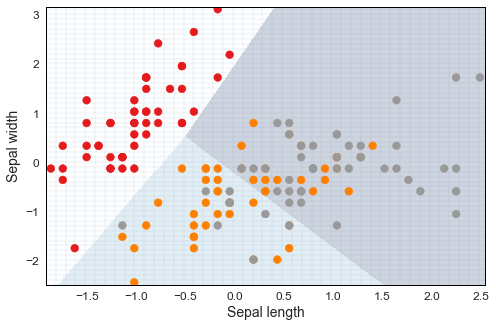

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris.astype(float))
sgd_clf = SGDClassifier(random_state=42, n_jobs=-1, penalty='l1', max_iter=100000)
sgd_clf.fit(X_iris_scaled, y_iris)
plot_iris_clf(sgd_clf, X_iris_scaled, 0.5, 'large')

In [104]:
#Train Model
start_training = timer()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
sgd_clf = SGDClassifier(random_state=42, n_jobs=-1, penalty='l1', max_iter=ITERATIONS)
sgd_clf.fit(X_train_scaled, y_train)
end_training = timer()

#Scale the test set first
X_test_scaled = scaler.fit_transform(X_test.astype(float))

#Get Metrics
cross_val = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)
y_test_pred = sgd_clf.predict(X_test_scaled)
score = accuracy_score(y_test, y_test_pred)
end_train_test = timer()

#Store and Print Summary
metrics = ['SGD Classifier with l1 Regularisation (Lasso)', score, cross_val.mean(), (end_training-start_training), (end_train_test-start_training)]
classifier_metrics.append(metrics)

In [105]:
print("Accuracy: %.4f" % score)
print("Cross validation Accuracy: %0.4f" % cross_val.mean())
print("Training Time: %.1f sec" % (end_training-start_training))
print("Testing Time: %.1f sec" % (end_train_test-start_training))

Accuracy: 0.9140
Cross validation Accuracy: 0.8729
Training Time: 269.2 sec
Testing Time: 761.3 sec


<a id='SGD_Classifier_with_elasticnet_Regularisation'></a>
## SGD Classifier with 'ElasticNet' Regularisation

Finally, let's go again but this time with Elastic Net regularisation:

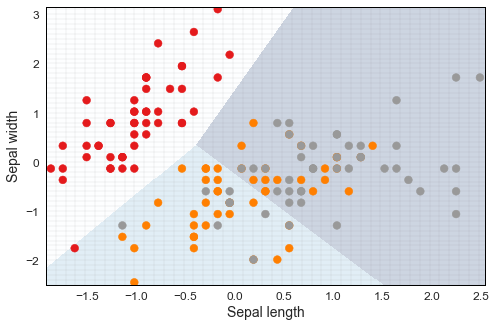

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris.astype(float))
sgd_clf = SGDClassifier(random_state=42, n_jobs=-1, penalty='elasticnet', max_iter=100000)
sgd_clf.fit(X_iris_scaled, y_iris)
plot_iris_clf(sgd_clf, X_iris_scaled, 0.5, 'large')

In [108]:
#Train Model
start_training = timer()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
sgd_clf = SGDClassifier(random_state=42, n_jobs=-1, penalty='elasticnet', max_iter=ITERATIONS)
sgd_clf.fit(X_train_scaled, y_train)
end_training = timer()

#Scale the test set first
X_test_scaled = scaler.fit_transform(X_test.astype(float))

#Get Metrics
cross_val = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)
y_test_pred = sgd_clf.predict(X_test_scaled)
score = accuracy_score(y_test, y_test_pred)
end_train_test = timer()

#Store and Print Summary
metrics = ['SGD Classifier with ElasticNet Regularisation', score, cross_val.mean(), (end_training-start_training), (end_train_test-start_training)]
classifier_metrics.append(metrics)

In [109]:
print("Accuracy: %.4f" % score)
print("Cross validation Accuracy: %0.4f" % cross_val.mean())
print("Training Time: %.1f sec" % (end_training-start_training))
print("Testing Time: %.1f sec" % (end_train_test-start_training))

Accuracy: 0.9129
Cross validation Accuracy: 0.8717
Training Time: 307.3 sec
Testing Time: 876.3 sec


We should use some regularisation and we have just seen Ridge, Lasso and Elastic Net but which to use?

Ridge Regularisation - variables with a minor contribution are given coefficients close to zero, but all the variables are incorporated in the model. 

Lasso Regularisation - the coefficients of some less contributive variables are set to be exactly zero. Only the most significant variables are kept in the final model, so Lasso Regression autmatically performs feature selection and outputs a sparse model.

Elastic Net Regularisation - a combination of ridge and lasso regression. It shrinks some coefficients toward zero (like ridge regression) and sets some coefficients to exactly zero (like lasso regression).

A good default is Ridge. If only a few features are useful (you could check feature importances shown earlier) then Elastic Net is preferred over Lasso.

<a id='Logistic_Regression'></a>
## Logistic Regression

Note that logistic regression, despite its name, is a linear model that can be used for classification.

First, a quick look at how Logistic Regression Classifier divides up the simple Iris data. 

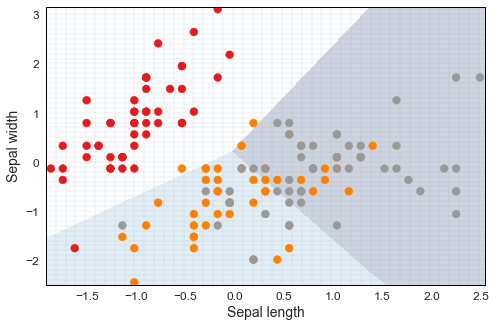

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris.astype(float))
log_reg = LogisticRegression(random_state=42, solver="liblinear", max_iter=100000)
log_reg.fit(X_iris_scaled, y_iris)
plot_iris_clf(log_reg, X_iris_scaled, 0.5, 'large')

Logistic Regression, at least when used with regularisation, can benefit from scaling. Let's add that in and train the model:

In [111]:
#Train Model
start_training = timer()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
log_reg = LogisticRegression(random_state=42, solver="liblinear", max_iter=ITERATIONS)
log_reg.fit(X_train_scaled, y_train)
end_training = timer()

#Scale the test set first
X_test_scaled = scaler.fit_transform(X_test.astype(float))

#Get Metrics
cross_val = cross_val_score(log_reg, X_train_scaled, y_train, cv=3, scoring="accuracy")
y_test_pred = log_reg.predict(X_test_scaled)
score = accuracy_score(y_test, y_test_pred)
end_train_test = timer()

#Store and Print Summary
metrics = ['Logistic Regression', score, cross_val.mean(), (end_training-start_training), (end_train_test-start_training)]
classifier_metrics.append(metrics)

In [112]:
print("Accuracy: %.4f" % score)
print("Cross validation Accuracy: %0.4f" % cross_val.mean())
print("Training Time: %.1f sec" % (end_training-start_training))
print("Testing Time: %.1f sec" % (end_train_test-start_training))

Accuracy: 0.9175
Cross validation Accuracy: 0.9097
Training Time: 771.3 sec
Testing Time: 2191.0 sec


<a id='Softmax_Regression'></a>
## Softmax Regression

When calling the LogisticRegression classifier with parameter 'multi_class=multinomial', the softmax function is used:

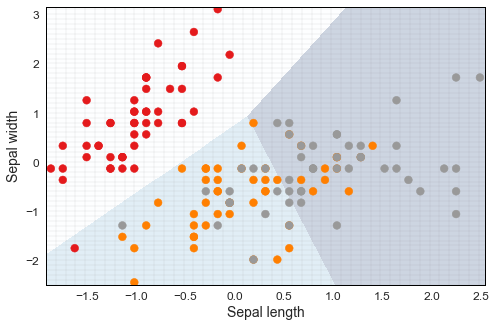

In [113]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris.astype(float))
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42, max_iter=100000, n_jobs=-1)
softmax_reg.fit(X_iris_scaled, y_iris)
plot_iris_clf(softmax_reg, X_iris_scaled, 0.5, 'large')

In [114]:
#Train Model
start_training = timer()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42, max_iter=ITERATIONS, n_jobs=-1)
softmax_reg.fit(X_train_scaled, y_train)
end_training = timer()

#Scale the test set first
X_test_scaled = scaler.fit_transform(X_test.astype(float))

#Get Metrics
cross_val = cross_val_score(softmax_reg, X_train_scaled, y_train, cv=3, scoring="accuracy", n_jobs=-1)
y_test_pred = softmax_reg.predict(X_test_scaled)
score = accuracy_score(y_test, y_test_pred)
end_train_test = timer()

#Store and Print Summary
metrics = ['Softmax Regression', score, cross_val.mean(), (end_training-start_training), (end_train_test-start_training)]
classifier_metrics.append(metrics)

In [115]:
print("Accuracy: %.4f" % score)
print("Cross validation Accuracy: %0.4f" % cross_val.mean())
print("Training Time: %.1f sec" % (end_training-start_training))
print("Testing Time: %.1f sec" % (end_train_test-start_training))

Accuracy: 0.9217
Cross validation Accuracy: 0.9071
Training Time: 142.9 sec
Testing Time: 208.0 sec


Logistic Regression has to train and combine multiple binary classifiers to work on data with multiple groups (here we have 10 groups for the digits 0-9, also referred to as classes). Softmax is a way to get Logistic Regression working on multiclass datasets without having to do this multiple-binary-classifiers work. 

We do see that Linear Regression is taking ages to achieve the same accuracy as Softmax. So:

Logistic Regression: Used for the binary classification tasks.
Softmax Regression: Use for the multi-classification tasks.

<a id='SVM_using_LinearSVC'></a>
## SVM (using LinearSVC)

Before we use the LinearSVC Classifier, a comment on the SVC classifier. SVC is much slower than LinearSVC for linear classification, especially with large datasets. We'll use LinearSVC. The SVC classifier does have a trick which lets it use a polynomial features (curved boundaries) which we'll come onto shortly. 

For now, let's train a LinearSVC classifier, first with a quick look at it's decision boundaries on our Iris dataset: 

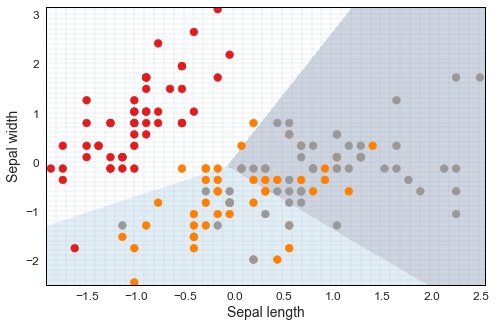

In [116]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris.astype(float))
linearSVC_clf = LinearSVC(C=0.1, random_state=42, loss="hinge", max_iter=100000)
linearSVC_clf.fit(X_iris_scaled, y_iris)
plot_iris_clf(linearSVC_clf, X_iris_scaled, 0.5, 'large')

Looks much like our previous classifiers. Now on to our handwriting dataset:

In [117]:
#Train Model
start_training = timer()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
linearSVC_clf = LinearSVC(C=1, random_state=42, loss="hinge", max_iter=ITERATIONS)
linearSVC_clf.fit(X_train_scaled, y_train)
end_training = timer()

#Scale the test set first
X_test_scaled = scaler.fit_transform(X_test.astype(float))

#Get Metrics
cross_val = cross_val_score(linearSVC_clf, X_train_scaled, y_train, cv=3, scoring="accuracy", n_jobs=-1)
y_test_pred = linearSVC_clf.predict(X_test_scaled)
score = accuracy_score(y_test, y_test_pred)
end_train_test = timer()

#Store and Print Summary
metrics = ['SVM (LinearSVC)', score, cross_val.mean(), (end_training-start_training), (end_train_test-start_training)]
classifier_metrics.append(metrics)

In [118]:
print("Accuracy: %.4f" % score)
print("Cross validation Accuracy: %0.4f" % cross_val.mean())
print("Training Time: %.1f sec" % (end_training-start_training))
print("Testing Time: %.1f sec" % (end_train_test-start_training))

Accuracy: 0.8912
Cross validation Accuracy: 0.8850
Training Time: 137.1 sec
Testing Time: 289.7 sec


<a id='SVM_Polynomial_Kernel'></a>
## SVM (Polynomial Kernel)

The SVC classifier can implement something called the 'kernel trick' which allows it get the same result as if it had added in many polynomial features to our dataset to help it find the best classifier bounaries, without the extra training time that adding polynomial features would take. Let's have a look:

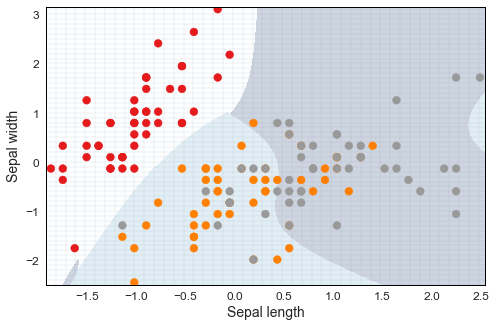

In [119]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris.astype(float))
poly_kernel_svm_clf = SVC(kernel="poly", degree=3, coef0=1, C=5, max_iter=100000)
poly_kernel_svm_clf.fit(X_iris_scaled, y_iris)
plot_iris_clf(poly_kernel_svm_clf, X_iris_scaled, 0.5, 'large')

In [120]:
#Train Model
start_training = timer()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
poly_kernel_svm_clf = SVC(kernel="poly", degree=3, coef0=1, C=5, max_iter=200)
poly_kernel_svm_clf.fit(X_train_scaled, y_train)
end_training = timer()

#Scale the test set first
X_test_scaled = scaler.fit_transform(X_test.astype(float))

#Get Metrics
cross_val = cross_val_score(poly_kernel_svm_clf, X_train_scaled, y_train, cv=3, scoring="accuracy", n_jobs=-1)
y_test_pred = poly_kernel_svm_clf.predict(X_test_scaled)
score = accuracy_score(y_test, y_test_pred)
end_train_test = timer()

#Store and Print Summary
metrics = ['SVM (Polynomial Kernel)', score, cross_val.mean(), (end_training-start_training), (end_train_test-start_training)]
classifier_metrics.append(metrics)

C:\Users\dombr_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [121]:
print("Accuracy: %.4f" % score)
print("Cross validation Accuracy: %0.4f" % cross_val.mean())
print("Training Time: %.1f sec" % (end_training-start_training))
print("Testing Time: %.1f sec" % (end_train_test-start_training))

Accuracy: 0.9475
Cross validation Accuracy: 0.9525
Training Time: 142.7 sec
Testing Time: 463.2 sec


<a id='SVM_RBF_Kernel'></a>
## SVM (RBF Kernel)

Gaussian Radial-Basis Function (RBF) is an another classifier like the SVM with 'polynomial kernel' previously.

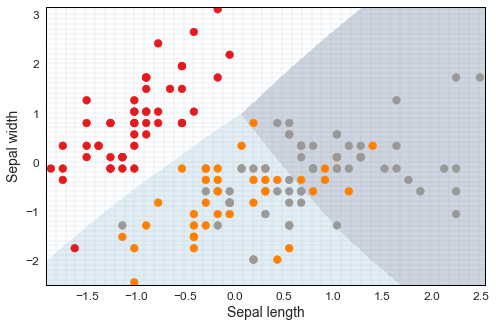

In [122]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris.astype(float))
rbf_kernel_svm_clf = SVC(kernel="rbf", gamma=0.05, C=5, max_iter=100000)
rbf_kernel_svm_clf.fit(X_iris_scaled, y_iris)
plot_iris_clf(rbf_kernel_svm_clf, X_iris_scaled, 0.5, 'large')

In [123]:
#Train Model
start_training = timer()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
rbf_kernel_svm_clf = SVC(kernel="rbf", gamma=0.001, C=0.5, max_iter=200)
rbf_kernel_svm_clf.fit(X_train_scaled, y_train)
end_training = timer()

#Scale the test set first
X_test_scaled = scaler.fit_transform(X_test.astype(float))

#Get Metrics
# Cross Validation not applicable
y_test_pred = rbf_kernel_svm_clf.predict(X_test_scaled)
score = accuracy_score(y_test, y_test_pred) 
end_train_test = timer()

#Store and Print Summary
metrics = ['SVM (RBF Kernel)', score, 'NA', (end_training-start_training), (end_train_test-start_training)]
classifier_metrics.append(metrics)

C:\Users\dombr_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [124]:
print("Accuracy: %.4f" % score)
print("Cross validation Accuracy: Not applicable")
print("Training Time: %.1f sec" % (end_training-start_training))
print("Testing Time: %.1f sec" % (end_train_test-start_training))

Accuracy: 0.8518
Cross validation Accuracy: 0.9525
Training Time: 211.2 sec
Testing Time: 286.5 sec


<a id='KNeighbors_Classifier'></a>
## KNeighbors Classifier

KNeighbors Classifier predicts the class of a data point based on the majority vote of class of its k nearest neighbors.

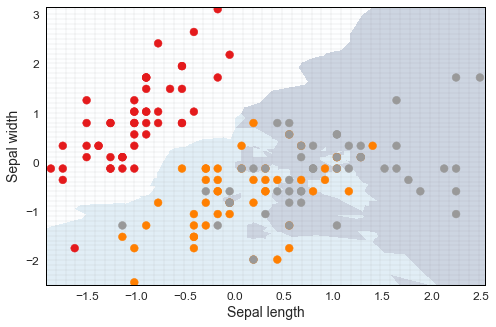

In [125]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris.astype(float))
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_iris_scaled, y_iris)
plot_iris_clf(knn_clf, X_iris_scaled, 0.5, 'large')

In [126]:
from sklearn.neighbors import KNeighborsClassifier

#Train Model
start_training = timer()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled, y_train)
end_training = timer()

#Scale the test set first
X_test_scaled = scaler.fit_transform(X_test.astype(float))

#Get Metrics
cross_val = cross_val_score(knn_clf, X_train_scaled, y_train, cv=3, scoring="accuracy", n_jobs=-1)
y_test_pred = knn_clf.predict(X_test_scaled)
score = accuracy_score(y_test, y_test_pred) 
end_train_test = timer()

#Store and Print Summary
metrics = ['KNeighbors', score, cross_val.mean(), (end_training-start_training), (end_train_test-start_training)]
classifier_metrics.append(metrics)

In [127]:
print("Accuracy: %.4f" % score)
print("Cross validation Accuracy: %0.4f" % cross_val.mean())
print("Training Time: %.1f sec" % (end_training-start_training))
print("Testing Time: %.1f sec" % (end_train_test-start_training))

Accuracy: 0.9423
Cross validation Accuracy: 0.9422
Training Time: 38.9 sec
Testing Time: 2502.4 sec


<a id='Decision_Tree'></a>
## Decision Tree

Let's train using a Decision Tree classifier:

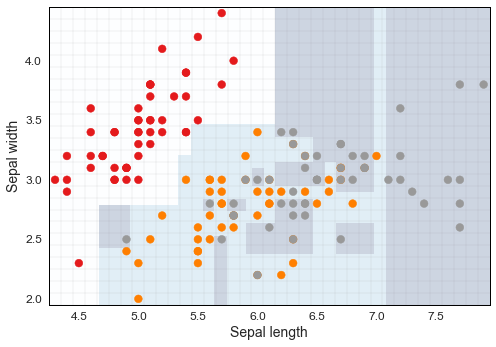

In [128]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
tree_clf = DecisionTreeClassifier(max_depth=10)
tree_clf.fit(X_iris, y_iris)
plot_iris_clf(tree_clf, X_iris, 1, 'large')

Now that we have a Decision Tree we look at the decisions made at each split:

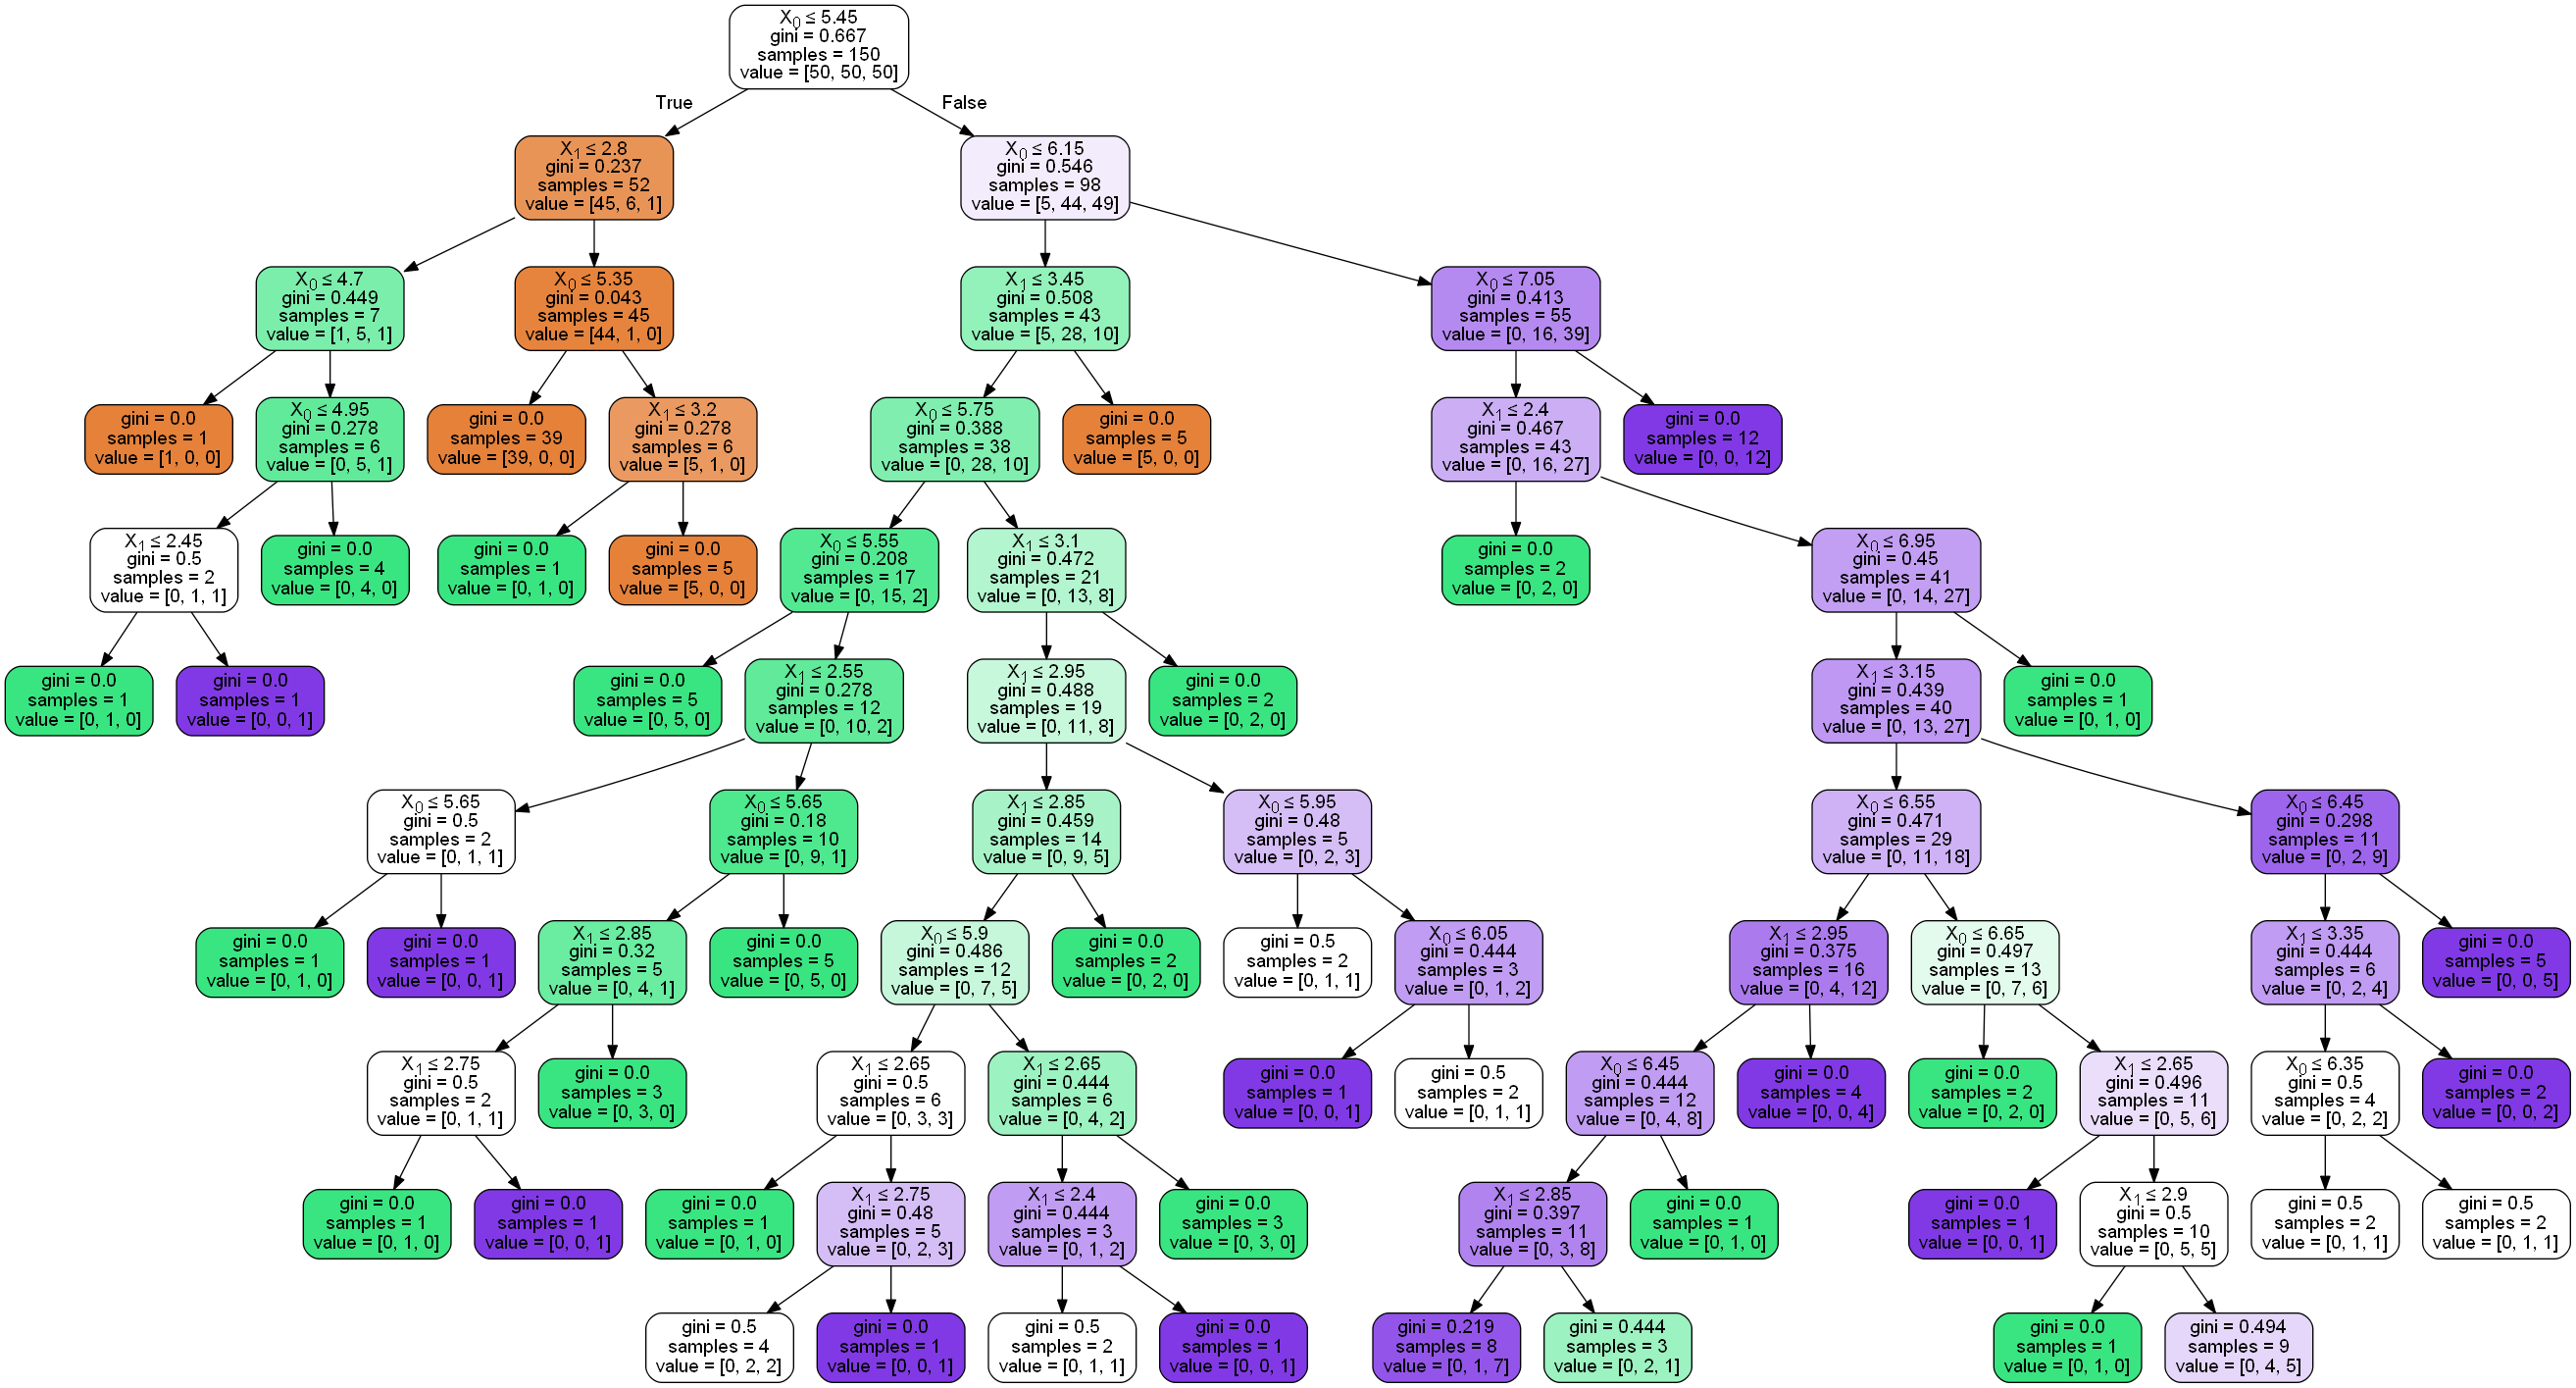

In [129]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(tree_clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=600, height=300)

Let's now train a Decision Tree on our handwriting dataset:

In [130]:
#Train Model
start_training = timer()
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
end_training = timer()

#Get Metrics
cross_val = cross_val_score(tree_clf, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)
y_test_pred = tree_clf.predict(X_test)
score = accuracy_score(y_test, y_test_pred) 
end_train_test = timer()

#Store and Print Summary
metrics = ['Decision Tree', score, cross_val.mean(), (end_training-start_training), (end_train_test-start_training)]
classifier_metrics.append(metrics)

In [131]:
print("Accuracy: %.4f" % score)
print("Cross validation Accuracy: %0.4f" % cross_val.mean())
print("Training Time: %.1f sec" % (end_training-start_training))
print("Testing Time: %.1f sec" % (end_train_test-start_training))

Accuracy: 0.8757
Cross validation Accuracy: 0.8621
Training Time: 18.7 sec
Testing Time: 43.4 sec


<a id='Random_Forest'></a>
## Random Forest

Decision Trees are sensitive to small variations in the training data and the splits generated on the training data often don't generalise well when we test with new data (overfitting).

Fortunately, they are simple and quick to generate allowing us to generate many tuned in slightly different ways. We can then combine their predictions to build a Random Forest classifier:  

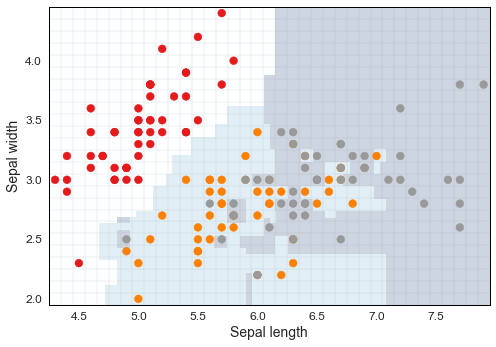

In [133]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
forest_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
forest_clf.fit(X_iris, y_iris)
plot_iris_clf(forest_clf, X_iris, 1, 'large')

In [134]:
#Train Model
start_training = timer()
forest_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
forest_clf.fit(X_train, y_train)
end_training = timer()

#Get Metrics
cross_val = cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")
y_test_pred = forest_clf.predict(X_test)
score = accuracy_score(y_test, y_test_pred) 
end_train_test = timer()

#Store and Print Summary
metrics = ['Random Forest', score, cross_val.mean(), (end_training-start_training), (end_train_test-start_training)]
classifier_metrics.append(metrics)

In [135]:
print("Accuracy: %.4f" % score)
print("Cross validation Accuracy: %0.4f" % cross_val.mean())
print("Training Time: %.1f sec" % (end_training-start_training))
print("Testing Time: %.1f sec" % (end_train_test-start_training))

Accuracy: 0.9472
Cross validation Accuracy: 0.9395
Training Time: 2.5 sec
Testing Time: 8.0 sec


<a id='Voting'></a>
## Voting

A Voting Classifier asks multiple classifiers of different types how they would vote on a new digit, and takes the majority opinion. This should help eliminate the times that one particular classifier struggles and gets the prediction wrong - it gets overruled. One nice aspect of this is that the voting classifier accuracy can be higher than any of the individual classifiers alone. Let's see it in action:

C:\Users\dombr_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


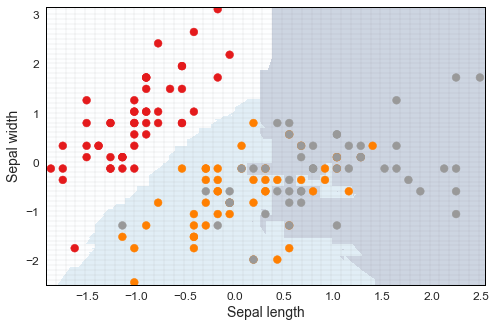

In [136]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris.astype(float))
#log_clf = LogisticRegression(random_state=42, solver="liblinear", max_iter=ITERATIONS)
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42, max_iter=ITERATIONS, n_jobs=-1)
rnd_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
#svm_clf = SVC(kernel="poly", degree=3, coef0=1, C=5, probability=True)
svm_clf = SVC(kernel="poly", degree=3, coef0=1, C=5, probability=True, max_iter=200)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_iris_scaled, y_iris)
plot_iris_clf(voting_clf, X_iris_scaled, 0.5, 'large')

In [137]:
#Train Model
start = timer()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42, max_iter=ITERATIONS, n_jobs=-1)
rnd_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

svm_clf = SVC(kernel="poly", degree=3, coef0=1, C=5, probability=True, max_iter=200)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train_scaled, y_train)
end = timer()

#Scale the test set first
X_test_scaled = scaler.fit_transform(X_test.astype(float))

#Get Metrics
cross_val = cross_val_score(voting_clf, X_train_scaled, y_train, cv=3, scoring="accuracy", n_jobs=-1)
y_test_pred = voting_clf.predict(X_test_scaled)
voting_score = accuracy_score(y_test, y_test_pred) 
end_train_test = timer()

#Store and Print Summary
metrics = ['Voting', score, cross_val.mean(), (end_training-start_training), (end_train_test-start_training)]
classifier_metrics.append(metrics)

C:\Users\dombr_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [138]:
print("Voting Accuracy: %.4f" % score)
print("Voting Cross validation Accuracy: %0.4f" % cross_val.mean())
print("Voting Training Time: %.1f sec" % (end_training-start_training))
print("Testing Time: %.1f sec" % (end_train_test-start_training))

Voting Accuracy: 0.9472
Voting Cross validation Accuracy: 0.9558
Voting Training Time: 2.5 sec
Testing Time: 1983.7 sec


<a id='Adaboost'></a>
## Adaboost

Adaboost trains a classifier and makes some predictions on the training dataset. This first classifier may get many instances wrong. Each item in the training dataset that didn't get predicted correctly gets a weight attached to it. A second classifier is then trained, with the weights causing it to pay a bit more attention to these difficult training items. This repeats, with consecutive predictors gradually scooping up more and more of the difficult points. 

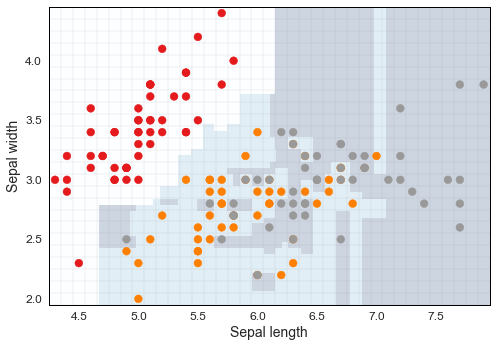

In [139]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(), n_estimators=25, algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_iris, y_iris)
plot_iris_clf(ada_clf, X_iris, 1, 'large')

In [140]:
#Train Model
start_training = timer()
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=10), n_estimators=25,
    algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)
end_training = timer()

#Get Metrics
cross_val = cross_val_score(ada_clf, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)
y_test_pred = ada_clf.predict(X_test)
score = accuracy_score(y_test, y_test_pred) 
end_train_test = timer()

#Store and Print Summary
metrics = ['Adaboost', score, cross_val.mean(), (end_training-start_training), (end_train_test-start_training)]
classifier_metrics.append(metrics)

In [141]:
print("Accuracy: %.4f" % score)
print("Cross validation Accuracy: %0.4f" % cross_val.mean())
print("Training Time: %.1f sec" % (end_training-start_training))
print("Testing Time: %.1f sec" % (end_train_test-start_training))

Accuracy: 0.9395
Cross validation Accuracy: 0.9318
Training Time: 219.2 sec
Testing Time: 513.6 sec


<a id='Bagging'></a>
## Bagging

One way to improve accuracy is to use different classifiers as in the Voting Classifier discussed previously. Another approach is to train using the same classifier, just with looking at different, random subsets of the training data each time. Let's try it:

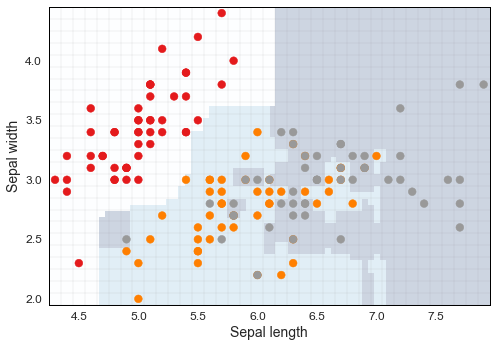

In [142]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=200,
        max_samples=100, bootstrap=True, n_jobs=-1
    )
bag_clf.fit(X_iris, y_iris)
plot_iris_clf(bag_clf, X_iris, 1, 'large')

In [143]:
from sklearn.tree import DecisionTreeClassifier

#Train Model
start_training = timer()
bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=50,
        max_samples=5000, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
end_training = timer()

#Get Metrics
cross_val = cross_val_score(bag_clf, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)
y_test_pred = bag_clf.predict(X_test)
score = accuracy_score(y_test, y_test_pred) 
end_train_test = timer()

#Store and Print Summary
metrics = ['Bagging', score, cross_val.mean(), (end_training-start_training), (end_train_test-start_training)]
classifier_metrics.append(metrics)

In [144]:
print("Accuracy: %.4f" % score)
print("Cross validation Accuracy: %0.4f" % cross_val.mean())
print("Training Time: %.1f sec" % (end_training-start_training))
print("Testing Time: %.1f sec" % (end_train_test-start_training))

Accuracy: 0.9357
Cross validation Accuracy: 0.9320
Training Time: 38.3 sec
Testing Time: 169.4 sec


In this Bagging Classifier we've trained lots of Decision Tree classifiers. This is sounding very similar to the Random Forest classifier, and it is! They are roughly equivalent.

<a id='SVM_&_Dimension_Reduction_Randomised_PCA'></a>
##  SVM & Dimension Reduction (Randomised PCA)

Currently each image in our dataset is comprised of 784 values. We are going to try and reduce this number, and we can look at the variance of the data with respect to the number of values, to help decide how much we can reduce it.

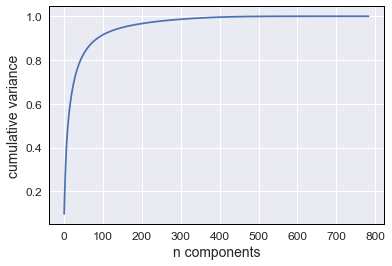

In [145]:
#sns.set_style("darkgrid")
sns.set_style({'axes.linewidth': 1, 'axes.edgecolor':'black'})
model = PCA(n_components=784, svd_solver="randomized")
model.fit_transform(X_train)
var=model.explained_variance_ratio_.cumsum()
plt.plot(var)
plt.xlabel('n components')
plt.ylabel('cumulative variance');

We can see that only 80 components are required to preserve 90% of the variance. Models are going to train much faster if they only have 80 items to worry about, rather than 784.

PCA is another example where Feature Scaling is important. Let's add scaling in:

In [146]:
# Scale data first
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))

#Reduce Dimensions
rnd_pca = PCA(n_components=80, svd_solver="randomized")
X_train_reduced = rnd_pca.fit_transform(X_train_scaled)
print(X_train.shape)
print(X_train_reduced.shape)

(60000, 784)
(60000, 80)


Yes, the original training set was 60000 images, each comprising 784 values (our 28x28 pixel values). We can see that the PCA transformation has reduced this to 80 values. Let's see how a classifier performs on this smaller dataset. Let's use the Softmax classifier from earlier:

In [147]:
#Train Model
start_training = timer()
#sgd_clf = SGDClassifier(random_state=42, n_jobs=-1, penalty='l2', max_iter=ITERATIONS)
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42, max_iter=ITERATIONS, n_jobs=-1)
sgd_clf.fit(X_train_reduced, y_train)
end_training = timer()

#Scale the test set first
X_test_scaled = scaler.fit_transform(X_test.astype(float))

# transform test set using already fitted pca
X_test_reduced = rnd_pca.transform(X_test_scaled)

#Get Metrics
cross_val = cross_val_score(sgd_clf, X_train_reduced, y_train, cv=3, scoring="accuracy", n_jobs=-1)
y_test_pred = sgd_clf.predict(X_test_reduced)
score = accuracy_score(y_test, y_test_pred)   
end_train_test = timer()

#Store and Print Summary
metrics = ['SVM & Dimension Reduction (Randomised PCA)', score, cross_val.mean(), (end_training-start_training), (end_train_test-start_training)]
classifier_metrics.append(metrics)

In [148]:
print("Accuracy: %.4f" % score)
print("Cross validation Accuracy: %0.4f" % cross_val.mean())
print("Training Time: %.1f sec" % (end_training-start_training))
print("Testing Time: %.1f sec" % (end_train_test-start_training))

Accuracy: 0.9007
Cross validation Accuracy: 0.8942
Training Time: 60.0 sec
Testing Time: 175.1 sec


Previously the Softmax Classifier gave us accuracy of 0.9134, in a training time of 3.7 sec. Here we have a small drop in accuracy for a large reduction in training time, and with the plot of variance letting us see how many components we need (here we used 80), we have a way to control this as we need. Good to know. Before we proceed, let's take a look at one of those compressed images:

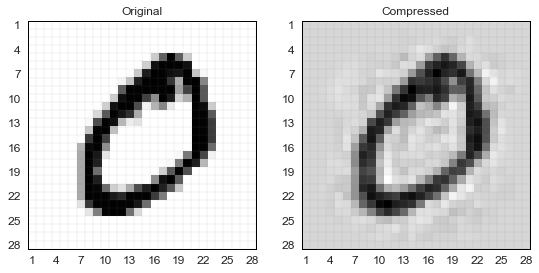

In [149]:
#view compressed images
rnd_pca = PCA(n_components=80, svd_solver="randomized")

example_images = np.r_[X[:12000:300], X[13000:30600:300], X[30600:60000:293]]
example_images_reduced = rnd_pca.fit_transform(example_images)
example_images_recovered = rnd_pca.inverse_transform(example_images_reduced)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,5))
sns.set_style({'axes.linewidth': 1, 'axes.edgecolor':'black'})

ax1.set_title('Original')
# Major ticks
ax1.set_xticks(np.arange(0, 28, 3));
ax1.set_yticks(np.arange(0, 28, 3));
# Labels for major ticks
ax1.set_xticklabels(np.arange(1, 29, 3));
ax1.set_yticklabels(np.arange(1, 29, 3));
# Minor ticks
ax1.set_xticks(np.arange(-.5, 28, 1), minor=True);
ax1.set_yticks(np.arange(-.5, 28, 1), minor=True);
# Gridlines based on minor ticks
ax1.grid(which='minor', color='grey', linestyle='-', linewidth=0.1)
ax1.grid(which='major', color='w', linestyle='-', linewidth=0)

ax2.set_title('Compressed')
# Major ticks
ax2.set_xticks(np.arange(0, 28, 3));
ax2.set_yticks(np.arange(0, 28, 3));
# Labels for major ticks
ax2.set_xticklabels(np.arange(1, 29, 3));
ax2.set_yticklabels(np.arange(1, 29, 3));
# Minor ticks
ax2.set_xticks(np.arange(-.5, 28, 1), minor=True);
ax2.set_yticks(np.arange(-.5, 28, 1), minor=True);
# Gridlines based on minor ticks
ax2.grid(which='minor', color='grey', linestyle='-', linewidth=0.1)
ax2.grid(which='major', color='w', linestyle='-', linewidth=0)

im1 = ax1.imshow(np.reshape(example_images[0], (28, 28)), cmap = matplotlib.cm.binary)
im2 = ax2.imshow(np.reshape(example_images_recovered[0], (28, 28)), cmap = matplotlib.cm.binary)

Have a try modifying the n_components=80 parameter to see the compression effect at different settings. 

## Summary

In [150]:
notepad_timer_stop = timer()
notepad_timer = notepad_timer_stop-notepad_timer_start
print(notepad_timer)

11064.353575337023


The following comparisons have been run on a laptop with with an Intel i7-4500U CPU with 8GB RAM.

In [151]:
labels = ['Classifier', 'Accuracy', 'Cross Validation', 'Training Time', 'Testing Time']
df =pd.DataFrame.from_records(classifier_metrics, columns=labels)
pd.set_option('precision',2)

#save to csv file
df.to_csv("C://Users//dombr_000//Desktop/Output.csv")

In [207]:
df

,Classifier,Accuracy,Cross Validation,Training Time,Testing Time
0,Ridge Classifier,0.86,0.85,2.20,13.51
1,SGD Classifier with l2 Regularisation (Ridge),0.91,0.91,63.16,187.87
2,SGD Classifier with l1 Regularisation (Lasso),0.91,0.87,269.24,761.33
3,SGD Classifier with ElasticNet Regularisation,0.91,0.87,307.31,876.25
4,Logistic Regression,0.92,0.91,771.33,2190.98
5,Softmax Regression,0.92,0.91,142.90,208.05
6,SVM (LinearSVC),0.89,0.88,137.13,289.69
7,SVM (Polynomial Kernel),0.95,0.95,142.74,463.24
8,SVM (RBF Kernel),0.85,0,211.24,286.50
9,KNeighbors,0.94,0.94,38.93,2502.40


In [153]:
#Appendix
#Generate mini-figures for the summary table at the start
fig, ax = plt.subplots(1, 1, figsize=(1.25,1.25))
sns.set_style({'axes.linewidth': 1, 'axes.edgecolor':'black'})
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris.astype(float))

#ax1.set_title('Ridge Classifier')
fig, ax = plt.subplots(1, 1, figsize=(1.25,1.25))
ridge_clf = RidgeClassifier(random_state=42, alpha=0.0001, solver='cholesky', max_iter=100000)
ridge_clf.fit(X_iris, y_iris)
plot_iris_clf(ridge_clf, X_iris, 1, 'small')
fig.savefig('C://Users//dombr_000//Desktop/Ridge1.png', bbox_inches='tight', pad_inches=0.02)
plt.close()

#SGD Classifier with l2 Regularisation (Ridge)
fig, ax = plt.subplots(1, 1, figsize=(1.25,1.25))
sgd_clf = SGDClassifier(random_state=42, n_jobs=-1, penalty='l2', max_iter=100000)
sgd_clf.fit(X_iris_scaled, y_iris)
plot_iris_clf(sgd_clf, X_iris_scaled, 0.53, 'small')
fig.savefig('C://Users//dombr_000//Desktop/Ridge2.png', bbox_inches='tight', pad_inches=0.02)
plt.close()

#SGD Classifier with l1 Regularisation (Lasso)
fig, ax = plt.subplots(1, 1, figsize=(1.25,1.25))
sgd_clf = SGDClassifier(random_state=42, n_jobs=-1, penalty='l1', max_iter=100000)
sgd_clf.fit(X_iris_scaled, y_iris)
plot_iris_clf(sgd_clf, X_iris_scaled, 0.53, 'small')
fig.savefig('C://Users//dombr_000//Desktop/Lasso.png', bbox_inches='tight', pad_inches=0.02)
plt.close()

#SGD Classifier with 'ElasticNet' Regularisation
fig, ax = plt.subplots(1, 1, figsize=(1.25,1.25))
sgd_clf = SGDClassifier(random_state=42, n_jobs=-1, penalty='elasticnet', max_iter=100000)
sgd_clf.fit(X_iris_scaled, y_iris)
plot_iris_clf(sgd_clf, X_iris_scaled, 0.53, 'small')
fig.savefig('C://Users//dombr_000//Desktop/ElasticNet.png', bbox_inches='tight', pad_inches=0.02)
plt.close()

#Logistic Regression
fig, ax = plt.subplots(1, 1, figsize=(1.25,1.25))
log_reg = LogisticRegression(random_state=42, solver="liblinear", max_iter=100000)
log_reg.fit(X_iris_scaled, y_iris)
plot_iris_clf(log_reg, X_iris_scaled, 0.53, 'small')
fig.savefig('C://Users//dombr_000//Desktop/LogReg.png', bbox_inches='tight', pad_inches=0.02)
plt.close()

#Softmax Regression
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42, max_iter=100000, n_jobs=-1)
softmax_reg.fit(X_iris_scaled, y_iris)
plot_iris_clf(softmax_reg, X_iris_scaled, 0.53, 'small')
fig.savefig('C://Users//dombr_000//Desktop/Softmax.png', bbox_inches='tight', pad_inches=0.02)
plt.close()

#SVM (using LinearSVC)
fig, ax = plt.subplots(1, 1, figsize=(1.25,1.25))
linearSVC_clf = LinearSVC(C=0.1, random_state=42, loss="hinge", max_iter=100000)
linearSVC_clf.fit(X_iris_scaled, y_iris)
plot_iris_clf(linearSVC_clf, X_iris_scaled, 0.53, 'small')
fig.savefig('C://Users//dombr_000//Desktop/SVM.png', bbox_inches='tight', pad_inches=0.02)
plt.close()

#SVM (Polynomial Kernel)
fig, ax = plt.subplots(1, 1, figsize=(1.25,1.25))
poly_kernel_svm_clf = SVC(kernel="poly", degree=3, coef0=1, C=5, max_iter=100000)
poly_kernel_svm_clf.fit(X_iris_scaled, y_iris)
plot_iris_clf(poly_kernel_svm_clf, X_iris_scaled, 0.53, 'small')
fig.savefig('C://Users//dombr_000//Desktop/SVMpoly.png', bbox_inches='tight', pad_inches=0.02)
plt.close()

#SVM (RBF Kernel)
fig, ax = plt.subplots(1, 1, figsize=(1.25,1.25))
rbf_kernel_svm_clf = SVC(kernel="rbf", gamma=0.05, C=5, max_iter=100000)
rbf_kernel_svm_clf.fit(X_iris_scaled, y_iris)
plot_iris_clf(rbf_kernel_svm_clf, X_iris_scaled, 0.53, 'small')
fig.savefig('C://Users//dombr_000//Desktop/SVMRBF.png', bbox_inches='tight', pad_inches=0.02)
plt.close()

#KNeighbors Classifier
fig, ax = plt.subplots(1, 1, figsize=(1.25,1.25))
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_iris_scaled, y_iris)
plot_iris_clf(knn_clf, X_iris_scaled, 0.53, 'small')
fig.savefig('C://Users//dombr_000//Desktop/KNeighbors.png', bbox_inches='tight', pad_inches=0.02)
plt.close()

#Decision Tree
fig, ax = plt.subplots(1, 1, figsize=(1.25,1.25))
tree_clf = DecisionTreeClassifier(max_depth=10)
tree_clf.fit(X_iris, y_iris)
plot_iris_clf(tree_clf, X_iris, 1, 'small')
fig.savefig('C://Users//dombr_000//Desktop/DecisionTree.png', bbox_inches='tight', pad_inches=0.02)
plt.close()

#Random Forest
fig, ax = plt.subplots(1, 1, figsize=(1.25,1.25))
forest_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
forest_clf.fit(X_iris, y_iris)
plot_iris_clf(forest_clf, X_iris, 1, 'small')
fig.savefig('C://Users//dombr_000//Desktop/RandomForest.png', bbox_inches='tight', pad_inches=0.02)
plt.close()

#Voting
fig, ax = plt.subplots(1, 1, figsize=(1.25,1.25))
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42, max_iter=ITERATIONS, n_jobs=-1)
rnd_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
svm_clf = SVC(kernel="poly", degree=3, coef0=1, C=5, probability=True, max_iter=200)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_iris_scaled, y_iris)
plot_iris_clf(voting_clf, X_iris_scaled, 0.53, 'small')
fig.savefig('C://Users//dombr_000//Desktop/Voting.png', bbox_inches='tight', pad_inches=0.02)
plt.close()

#Adaboost
fig, ax = plt.subplots(1, 1, figsize=(1.25,1.25))
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(), n_estimators=25, algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_iris, y_iris)
plot_iris_clf(ada_clf, X_iris, 1, 'small')
fig.savefig('C://Users//dombr_000//Desktop/Adaboost.png', bbox_inches='tight', pad_inches=0.02)
plt.close()

#Bagging
fig, ax = plt.subplots(1, 1, figsize=(1.25,1.25))
bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=200,
        max_samples=100, bootstrap=True, n_jobs=-1
    )
bag_clf.fit(X_iris, y_iris)
plot_iris_clf(bag_clf, X_iris, 1, 'small')
fig.savefig('C://Users//dombr_000//Desktop/Bagging.png', bbox_inches='tight', pad_inches=0.02)
plt.close()

C:\Users\dombr_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [178]:
df

,Classifier,Accuracy,Cross Validation,Training Time,Testing Time
0,Ridge Classifier,0.86,0.85,2.20,13.51
1,SGD Classifier with l2 Regularisation (Ridge),0.91,0.91,63.16,187.87
2,SGD Classifier with l1 Regularisation (Lasso),0.91,0.87,269.24,761.33
3,SGD Classifier with ElasticNet Regularisation,0.91,0.87,307.31,876.25
4,Logistic Regression,0.92,0.91,771.33,2190.98
5,Softmax Regression,0.92,0.91,142.90,208.05
6,SVM (LinearSVC),0.89,0.88,137.13,289.69
7,SVM (Polynomial Kernel),0.95,0.95,142.74,463.24
8,SVM (RBF Kernel),0.85,0.00,211.24,286.50
9,KNeighbors,0.94,0.94,38.93,2502.40
